In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
from IPython.display import clear_output
clear_output()

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## 1) Introduction : 
#### In this kernel we will try to work with an image datset and try to train an Image classifier using a custom CNN built with Tensorflow, will work with a dataset provided here 

https://www.kaggle.com/datasets/gpiosenka/coffee-bean-dataset-resized-224-x-224

Source: Ontoum, S., Khemanantakul, T., Sroison, P., Triyason, T., & Watanapa, B. (2022). Coffee Roast Intelligence. arXiv preprint arXiv:2206.01841.
url = {https://arxiv.org/abs/2206.01841},

In [2]:
#Start by setting up coding environment
import warnings
import tensorflow as tf
import os
import cv2
import imghdr
from matplotlib import pyplot as plt
warnings.filterwarnings('ignore')
tf.get_logger().setLevel('INFO')
df = pd.read_csv('../input/coffee-bean-dataset-resized-224-x-224/Coffee Bean.csv')
df

,class index,filepaths,labels,data set
0,0,train/Dark/dark (1).png,Dark,train
1,0,train/Dark/dark (10).png,Dark,train
2,0,train/Dark/dark (100).png,Dark,train
3,0,train/Dark/dark (101).png,Dark,train
4,0,train/Dark/dark (102).png,Dark,train
...,...,...,...,...
1595,3,test/Medium/medium (95).png,Medium,test
1596,3,test/Medium/medium (96).png,Medium,test
1597,3,test/Medium/medium (97).png,Medium,test
1598,3,test/Medium/medium (98).png,Medium,test


## 2) Details About the Dataset 
#### checking the Images

In [3]:
#setting up the trianing dir
data_dir = '../input/coffee-bean-dataset-resized-224-x-224/train' 
image_exts = ['.png']
#create an image dataset with the given images
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 1200 files belonging to 4 classes.


In [4]:
#itertaor for image iteration
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

clear_output()

Cleanup called...
Cleanup called...


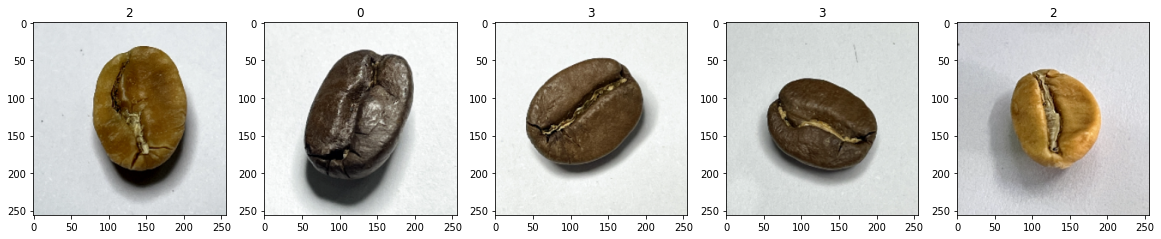

In [5]:
#Visualise a random batch
fig, ax = plt.subplots(ncols=5, figsize=(20,20))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## 3) Data Preparation:

#### We will resize images to 50 x 50 since our CNN model works with the same size. We will define the class labels as a list.

In [6]:
import random

IMG_SIZE = 50

DATADIR = '../input/coffee-bean-dataset-resized-224-x-224/train'

CATEGORIES = ['Dark', 'Green', 'Light','Medium']

for category in CATEGORIES :
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_UNCHANGED)

training_data = []

def create_training_data():
    for category in CATEGORIES :
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try :
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_UNCHANGED)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

create_training_data()

random.shuffle(training_data)

X = [] #features
y = [] #labels

for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y = np.asarray(y)

In [7]:
import pickle
# Creating the files containing all the information about our model
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

## 4) Model Building and Training

Epoch 1/40
34/34 [==============================] - 10s 16ms/step - loss: 1.1086 - accuracy: 0.4500 - val_loss: 0.6401 - val_accuracy: 0.6833
Epoch 2/40
34/34 [==============================] - 0s 6ms/step - loss: 0.3668 - accuracy: 0.8509 - val_loss: 0.3434 - val_accuracy: 0.8750
Epoch 3/40
34/34 [==============================] - 0s 5ms/step - loss: 0.2010 - accuracy: 0.9287 - val_loss: 0.0639 - val_accuracy: 0.9667
Epoch 4/40
34/34 [==============================] - 0s 6ms/step - loss: 0.1269 - accuracy: 0.9528 - val_loss: 0.0539 - val_accuracy: 0.9750
Epoch 5/40
34/34 [==============================] - 0s 6ms/step - loss: 0.1161 - accuracy: 0.9583 - val_loss: 0.0553 - val_accuracy: 0.9833
Epoch 6/40
34/34 [==============================] - 0s 6ms/step - loss: 0.0768 - accuracy: 0.9713 - val_loss: 0.1175 - val_accuracy: 0.9667
Epoch 7/40
34/34 [==============================] - 0s 6ms/step - loss: 0.0746 - accuracy: 0.9769 - val_loss: 0.0643 - val_accuracy: 0.9750
Epoch 8/40
34/34 [

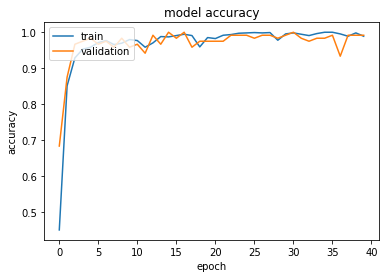

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

from keras.models import model_from_json
from keras.models import load_model
import matplotlib.pyplot as plt

# Opening the files about data
X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))

# normalizing data (a pixel goes from 0 to 255)
X = X/255.0

# Building the model
model = Sequential()
# 3 convolutional layers
model.add(Conv2D(32, (3, 3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 2 hidden layers
model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))

model.add(Dense(128))
model.add(Activation("relu"))

# The output layer with 4 neurons, for 4 classes
model.add(Dense(4))
model.add(Activation("softmax"))

# Compiling the model using some basic parameters
model.compile(loss="sparse_categorical_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

# Training the model, with 40 iterations
# validation_split corresponds to the percentage of images used for the validation phase compared to all the images
history = model.fit(X, y, batch_size=32, epochs=40, validation_split=0.1)

# Saving the model
model_json = model.to_json()
with open("model.json", "w") as json_file :
    json_file.write(model_json)

model.save_weights("model.h5")
print("Saved model to disk")

model.save('CNN.model')

# Printing a graph showing the accuracy changes during the training phase
print(history.history.keys())
plt.figure(1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

## 5) Model Evaluation 
#### The model is preforming quiet okay infact,average accuracy of 99 % 

## 6) Prediction using trained model

#### Below we have picked a single image from the test set and tried to predict. Our model seems to be predicting accurately.

In [9]:
IMG_PATH = "../input/coffee-bean-dataset-resized-224-x-224/test/Light/light (1).png"
img_array = cv2.imread(IMG_PATH, cv2.IMREAD_UNCHANGED)

IMG_SIZE = 50
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))

Xt = new_array
Xt = np.array(Xt).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

pickle_out = open("Xt.pickle", "wb")
pickle.dump(Xt, pickle_out)
pickle_out.close()

pickle_in = open("Xt.pickle", "rb")
Xt = pickle.load(pickle_in)

Xt = pickle.load(open("Xt.pickle", "rb"))
Xt = Xt/255

prediction = model.predict(Xt)

prediction = list(prediction[0])
print(CATEGORIES[prediction.index(max(prediction))])

Light


__END__